# Atelier théorique #4 - **Statistiques descriptives**

## Objectifs de cette leçon
1. Obtenir un **aperçu des données**
2. Réviser les **dimensions du jeu de données**
3. Identifier les **types de variables** dans le jeu de données
5. Faire un **sommaire des classes** de la variable à prédire
6. Effectuer des **statistiques descriptives** sur les variables du jeu de données
7. Observer la **distribution des variables** du jeu de données

> Les étapes montrées dans ce Notebook sont utilisées dans CHAQUE projet d'apprentissage automatique.

In [ ]:
# Importer la librairie pandas
import pandas as pd

# Télécharger le jeu de données
data = pd.read_csv('diabetes.csv')

# Remplacer le nom des colonnes
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data.columns = colnames

### 1. Aperçu des données

Jeter un coup d'oeil aux données brutes permet de révéler des indices qu'il n'est pas possible de découvrir autrement.

On peut utiliser la fonction `.head()` pour un aperçu des premières lignes ou  la fonction `.tail()` pour un aperçu des dernières lignes.

Documentation : 
* head : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
* tail : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail


#### L'intuition
Observer les données brutes offre aussi l'occasion de développer notre **intuition** sur les données. En visualisant les données tabulaires, on parvient à comprendre mieux l'utilité des données et cela nous permettra de développer des modèles plus adéquats dans les prochaines étapes. **L'intuition est une des qualité essentielle à acquérir pour devenir un scientifique de données.**





In [ ]:
# Aperçu des 20 premières lignes du jeu de données
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 2. Dimensions du jeu de données

On peut obtenir les dimensions et la grandeur du jeu de données avec la propriété `.shape`.

Il est aussi possible d'extraire les titres de colonnes et de lignes avec `.columns` et `.index`.

Documentation : 
* shape : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
* columns : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html
* index : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html

In [ ]:
# Dimension du jeu de données
data.shape

(768, 9)

In [ ]:
# Noms des colonnes
data.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [ ]:
# Index des lignes
data.index

RangeIndex(start=0, stop=768, step=1)

In [ ]:
# Nombre de colonnes
print(f'Nombre de colonnes: {len(data.columns)}')
print(f'Nombre de lignes: {len(data.index)}')

Nombre de colonnes: 9
Nombre de lignes: 768


Les résultats indiquent que le jeu de données contient **768 lignes** et **9 colonnes**.

Quelques points importants : 
1. Trop de lignes pourrait ralentir l'entraînement des algorithmes et la manipulation des données.
2. Trop de colonnes pourrait réduire la performance des algorithmes et nuire à l'explication des modèles.

### 3. Types de données

Il est essentiel d'identifier les types de données qui sont présents dans un jeu de données avant de commencer à le manipuler et à faire des analyses. 

La propriété `.dtypes` et la méthode `.info()` permettent tous deux d'explorer les types de données. 

Documentation : 
* dtypes : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
* info() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html 


In [ ]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Pour chaque variable, obtenir seulement le type de données
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

En plus d'identifier les types de données, `.info()` permet aussi de voir s'il y a des **valeurs nulles** dans le jeu de données. 

In [ ]:
# Pour chaque variable, obtenir le type de données ET un compte de valeur non-nulle
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4. Statistiques descriptives

Voici l'information qu'il est possible d'obtenir avec `.describe()`.
* Compte (count)
* Moyenne (mean)
* Écart-type (std)
* Valeur minimum (min)
* 25e percentile (25%)
* Médiane (50%)
* 75e percentile (75%)
* Valeur maximum (max)

Documentation : 
* describe : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [ ]:
# Obtenir une description sommaire des données
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 5. Sommaire des classes à prédire

Tel que mentionné précédemment, la classe à prédire (communément appelé `target` ou `class`) doit aussi être explorer pour s'assurer d'avoir un jeu de données balancé.

Documentation : 
* groupby() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
* size() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html 

In [ ]:
# Évaluer si le jeu de données est balancé
data.groupby('class').size()

class
0    500
1    268
dtype: int64

### 6. Corrélations entre les variables

La matrice de corrélation permet de voir toutes les corrélations pour chaque paire de variables du jeu de données. 

La valeur de la corrélation suit un gradient de -1 à 1. Elle peut donc être...
* Positive (+) ou Négative (-)
* Forte (1 ou -1) ou Nulle (0)

Documentation : 
* corr() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html 

In [ ]:
# Produire un tableau de corrélations de Pearson
data.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 7. Distribution et assimétrie ("skewness") des variables 

Plusieurs algorithmes d'apprentissage automatique assume la normalité des données, c'est-à-dire un distribution Gaussienne. 

La valeur d'assimétrie peut être négative (de la gauche) ou positive (de la droite). Une valeur de 0 signifie une distribution simétrique, donc normale.

De façon générale, une valeur entre -2 et +2 est considérée acceptable.

Documentation :
* skew : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html

(array([1., 0., 0., 0., 0., 1., 0., 0., 2., 4.]),
 array([52. , 56.6, 61.2, 65.8, 70.4, 75. , 79.6, 84.2, 88.8, 93.4, 98. ]),
 <a list of 10 Patch objects>)

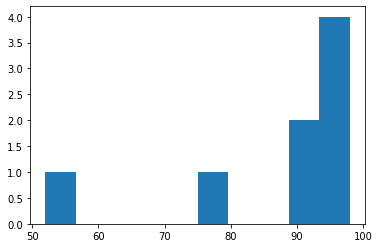

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
myarray = np.array([96, 94, 90, 95, 75, 89, 52, 98])
plt.hist(myarray)

In [ ]:
# Obtenir les valeurs d'asymétrie pour chaque variable
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

### Sommaire

Dans cette leçon, on a appris plusieurs méthodes afin d'explorer un jeu de données avec des statistiques descriptives.

Nouvelles méthodes apprises :
* data.dtypes
* data.info()
* data.describe()
* data.groupby().size()
* data.corr(method="pearson")
* data.skew


### Suivant - Visualisation des données

Vous verrez entre autre dans la prochaine leçon comment... 
* Visualiser les corrélations dans un graphique.
* Visualiser la distribution des données dans un graphique.


## **LEÇON #4 - EXERCICE PRATIQUE**

> *Utiliser votre notebook individuel `chapitre_3_pratique_classification_binaire.ipynb`*

### Description
En utilisant le notebook pratique que vous avez commencer à utiliser durant la dernière leçon, accomplir les tâches énumérées ci-dessous.

> **Répondre aux questions dans une cellule de texte Markdown au fur et à mesure que vous progressez.**

## Tâches à accomplir :
1. Refaites rouler les cellules de code de la dernière leçon.
  * Vous devriez par le fait même obtenir à nouveau un aperçu et la structure de base du jeu de données. 
  * C'est une bonne occasion de se rafraîchir la mémoire sur les codes écrits précédemment tout en s'assurant qu'ils fonctionnent toujours bien. **Vous pouvez d'ailleurs constamment l'améliorer!**
2. Obtenir les types de données pour chaque variable. 
  * **Question 2.1 :** Quels sont les types de données pour chaque variable?
  * **Question 2.2 :** Y a-t-il des valeurs nulles dans le jeu de données?
3. Extraire la description statistique sommaire des variables.
  * **Question 3.1 :** Veuillez classer les variables de la moyenne la plus élevé à celle la plus basse.
4. Effectuer le sommaire des classes à prédire de la colonne `class`.
  * **Question 4.1 :** Est-ce que les classes sont balancées?
  * **Question 4.2 :** Quelle classe est la plus fréquente?
5. Produire la matrice de corrélation entres les différentes variables.
  * **Question 5.1 :** Quelles sont les deux variables avec la plus **forte** corrélation?
  * **Question 5.2 :** Quelles sont les deux variables avec la plus **faible** corrélation?
6. Vérifier la normalité des données en calculant leur assimétrie. 
  * **Question 6.1:** Quelle est la variable qui dévie le plus d'une distribution normale? En d'autres mots, quelle est la variable la plus assimétrique? 
  * **Question 6.2:** Est-ce que cette variable présente une assimétrie positive ou négative?